In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import numpy as np


In [2]:
df= pd.read_csv("raw_sales.csv")

In [3]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [10]:
type (df)

pandas.core.frame.DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
# function to detect outlers on one dimentional data sets 

In [15]:
import statistics

def find_anomoly (data) :
    anomaly = []

    # Calculate standard deviation and mean
    data_std = statistics.stdev(data)
    data_mean = statistics.mean(data)

    # Set upper and lower limits to 3 standard deviations
    anomaly_cut_off = data_std * 3
    lower_limit = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off

    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomaly.append(outlier)

    return anomaly


In [18]:
df.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [28]:
list1 =find_anomoly(df['price']) # FINDING THE ANOMOLIES IN PRICE COLUMNS



In [29]:
len(list1) # NO OF OUTLIERS PRESENT IN PRICE COLUMN

461

In [33]:
len(df)

29580

In [41]:
df.price.skew() # before tranformation

4.312009366902366

In [34]:
import seaborn as sa

<Axes: xlabel='price', ylabel='Density'>

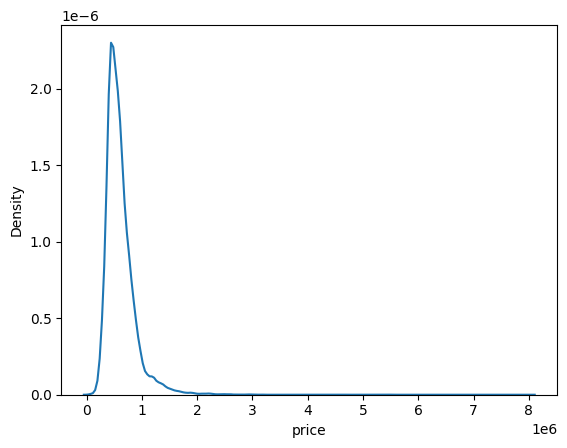

In [38]:
sa.kdeplot(df.price)

In [39]:
df['price_tranformed']= np.log(df.price)

In [40]:
df.price_tranformed.skew() # after transformation 

0.4731646269984763

In [42]:
transformed_data_list =find_anomoly(df.price_tranformed)

In [43]:
len(transformed_data_list # after 

266

<Axes: ylabel='Density'>

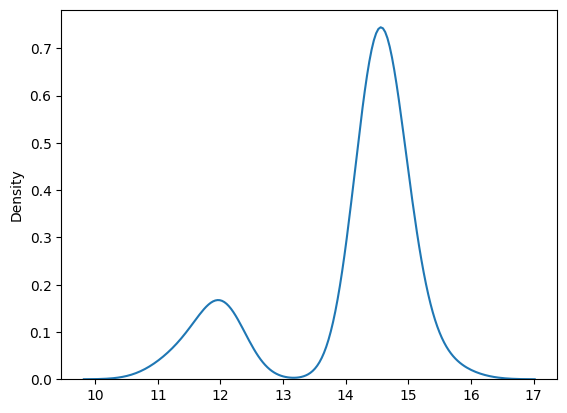

In [44]:
sa.kdeplot(transformed_data_list)

In [ ]:
# again transform the data 


In [49]:
df['double_price_transformed']= np.log(df.price_tranformed)

In [51]:
df['double_price_transformed'].skew()

0.33092530655758573

In [53]:
list3 = find_anomoly(df.double_price_transformed)

In [54]:
len(list3)

251

<Axes: ylabel='Density'>

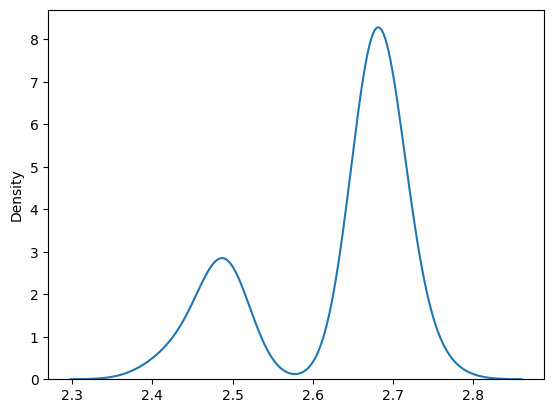

In [55]:
sa.kdeplot(list3)

In [ ]:
# boxplot visualization 

In [56]:
df

,datesold,postcode,price,propertyType,bedrooms,price_tranformed,ouble_price_transformed,double_price_transformed
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209,2.537209
...,...,...,...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3,13.122363,2.574318,2.574318
29576,2019-07-25 00:00:00,2612,560000,unit,2,13.235692,2.582917,2.582917
29577,2019-07-26 00:00:00,2912,464950,unit,2,13.049685,2.568764,2.568764
29578,2019-07-26 00:00:00,2601,589000,unit,2,13.286181,2.586725,2.586725


In [ ]:
#boxplot visual

<Axes: >

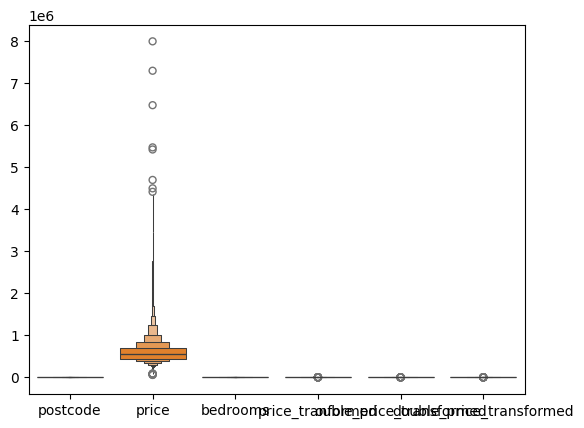

In [58]:
sa.boxenplot(df)

In [ ]:
#as yoy can see there are so many outliers are there in price column , most of values lies bitween 35-75 ,
#from the above boxplot visual we can get that every thing above the 75 and below the 35 are the outliers

In [60]:
# statistical information of the dataframe columns 
df.describe()

,postcode,price,bedrooms,price_tranformed,ouble_price_transformed,double_price_transformed
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002,2.766002
